In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pga_df = pd.read_csv('ASA All PGA Raw Data - Tourn Level.csv')

In [3]:
pga_df.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


In [4]:
pga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [5]:
pga_df.drop(columns=(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']), inplace=True)

In [6]:
#converting date to a datetime
pga_df['date'] = pd.to_datetime(pga_df['date'])

In [7]:
pga_df_cleaned = pga_df.dropna()

In [8]:
pga_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 36751
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Player_initial_last  16291 non-null  object        
 1   tournament id        16291 non-null  int64         
 2   player id            16291 non-null  int64         
 3   hole_par             16291 non-null  int64         
 4   strokes              16291 non-null  int64         
 5   hole_DKP             16291 non-null  float64       
 6   hole_FDP             16291 non-null  float64       
 7   hole_SDP             16291 non-null  int64         
 8   streak_DKP           16291 non-null  int64         
 9   streak_FDP           16291 non-null  float64       
 10  streak_SDP           16291 non-null  int64         
 11  n_rounds             16291 non-null  int64         
 12  made_cut             16291 non-null  int64         
 13  pos                  16291 non-

In [9]:
pga_df_cleaned[pga_df_cleaned['pos'] == 1.0]

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
16,B. Horschel,401353224,1651,288,275,77.0,75.5,82,6,16.2,...,12.0,2022,0,1,0.95,1.31,1.25,0.84,3.39,4.35
204,S. Burns,401353225,9938,280,271,75.0,71.5,70,3,18.8,...,8.4,2022,0,1,1.26,0.18,0.97,0.71,1.86,3.12
286,J. Thomas,401353226,4848,280,275,65.0,61.1,66,0,11.4,...,15.0,2022,0,1,1.58,0.81,0.53,0.66,2.00,3.58
427,K. Lee,401353227,7083,288,262,110.5,109.5,97,14,35.6,...,9.1,2022,0,1,0.97,0.68,1.31,0.57,2.56,3.53
575,M. Homa,401353228,8973,280,272,77.0,70.8,70,3,17.8,...,9.0,2022,0,1,2.10,-0.87,1.06,1.47,1.66,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35793,J. Day,2234,1680,288,279,79.5,73.2,75,3,7.4,...,6.3,2015,0,1,0.37,0.06,0.89,0.81,1.77,2.14
35869,B. Koepka,2232,6798,284,269,83.5,81.8,83,9,18.4,...,6.3,2015,0,1,0.90,0.81,0.90,0.67,2.38,3.28
36145,J. Walker,2235,446,280,257,102.5,102.4,89,14,31.2,...,5.6,2015,0,1,2.57,-0.15,1.23,1.16,2.24,4.81
36438,N. Taylor,2254,3792,288,272,85.0,84.2,82,9,25.0,...,4.0,2015,0,1,1.48,0.30,0.83,0.84,1.98,3.46


In [10]:
sg_cols = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

In [11]:
avg_sg_by_pos = pga_df_cleaned.groupby('pos')[sg_cols].mean().round(2).reset_index()
avg_sg_by_pos.head()

,pos,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,1.0,1.23,0.42,1.30,0.68,2.40,3.62
1,2.0,1.01,0.42,1.10,0.59,2.11,3.12
2,3.0,0.93,0.35,1.07,0.50,1.92,2.85
3,4.0,0.86,0.34,0.85,0.49,1.68,2.54
4,5.0,0.82,0.37,0.81,0.46,1.65,2.46


In [12]:
cleaned_pga_df_w_avg = pga_df_cleaned.merge(avg_sg_by_pos, on='pos', how='left', suffixes=('', '_avg_for_pos'))

In [14]:
cleaned_pga_df_w_avg.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,sg_app,sg_ott,sg_t2g,sg_total,sg_putt_avg_for_pos,sg_arg_avg_for_pos,sg_app_avg_for_pos,sg_ott_avg_for_pos,sg_t2g_avg_for_pos,sg_total_avg_for_pos
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,-0.08,0.86,0.65,0.85,0.29,0.10,0.22,0.12,0.45,0.73
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,0.31,0.18,1.24,1.60,0.47,0.22,0.42,0.32,0.97,1.44
2,A. Rai,401353224,10906,288,287,63.0,55.7,58,3,7.2,...,-1.32,-0.12,-0.70,1.35,0.25,0.20,0.41,0.13,0.74,1.00
3,A. Schenk,401353224,10372,288,287,59.5,54.0,59,0,7.8,...,1.84,0.48,2.31,1.35,0.25,0.20,0.41,0.13,0.74,1.00
4,A. Scott,401353224,388,288,299,48.5,34.7,48,0,5.4,...,2.00,-1.04,-0.83,-1.65,-0.30,-0.25,-0.37,-0.18,-0.80,-1.08


In [15]:
# for col in sg_cols:
#     cleaned_pga_df_w_avg[f"{col}_delta"] = cleaned_pga_df_w_avg[col] - cleaned_pga_df_w_avg[f"{col}_avg_for_pos"]   

In [16]:
cleaned_pga_df_w_avg.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,sg_app,sg_ott,sg_t2g,sg_total,sg_putt_avg_for_pos,sg_arg_avg_for_pos,sg_app_avg_for_pos,sg_ott_avg_for_pos,sg_t2g_avg_for_pos,sg_total_avg_for_pos
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,-0.08,0.86,0.65,0.85,0.29,0.10,0.22,0.12,0.45,0.73
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,0.31,0.18,1.24,1.60,0.47,0.22,0.42,0.32,0.97,1.44
2,A. Rai,401353224,10906,288,287,63.0,55.7,58,3,7.2,...,-1.32,-0.12,-0.70,1.35,0.25,0.20,0.41,0.13,0.74,1.00
3,A. Schenk,401353224,10372,288,287,59.5,54.0,59,0,7.8,...,1.84,0.48,2.31,1.35,0.25,0.20,0.41,0.13,0.74,1.00
4,A. Scott,401353224,388,288,299,48.5,34.7,48,0,5.4,...,2.00,-1.04,-0.83,-1.65,-0.30,-0.25,-0.37,-0.18,-0.80,-1.08


In [17]:
dj_pos_1_df = cleaned_pga_df_w_avg[(cleaned_pga_df_w_avg['player'] == 'Dustin Johnson') & (cleaned_pga_df_w_avg['pos'] == 1)]

In [18]:
dj_avg = dj_pos_1_df[sg_cols].mean()

In [19]:
dj_avg.head()

sg_putt    1.083333
sg_arg     0.344167
sg_app     1.466667
sg_ott     1.182500
sg_t2g     2.994167
dtype: float64

In [20]:
winners_df = cleaned_pga_df_w_avg[cleaned_pga_df_w_avg['pos'] == 1]
avg_winner = winners_df[sg_cols].mean()

In [21]:
winners_df['player'].value_counts()

Dustin Johnson       12
Justin Thomas         9
Bryson DeChambeau     8
Jordan Spieth         7
Rory McIlroy          7
                     ..
Nate Lashley          1
Matthew Wolff         1
Dylan Frittelli       1
J.T. Poston           1
Ben Martin            1
Name: player, Length: 123, dtype: int64

In [22]:
winners_df_no_df = winners_df[winners_df['player'] != 'Dustin Johnson']
avg_winner_no_dj = winners_df_no_df[sg_cols].mean()

In [23]:
comparison_df = pd.DataFrame({
    "Dustin Johnson": dj_avg,
    "Avg Winner minus DJ": avg_winner_no_dj
})

In [24]:
dj_avg

sg_putt     1.083333
sg_arg      0.344167
sg_app      1.466667
sg_ott      1.182500
sg_t2g      2.994167
sg_total    4.075000
dtype: float64

In [25]:
avg_winner_no_dj

sg_putt     1.236391
sg_arg      0.425348
sg_app      1.293565
sg_ott      0.653913
sg_t2g      2.374000
sg_total    3.591391
dtype: float64

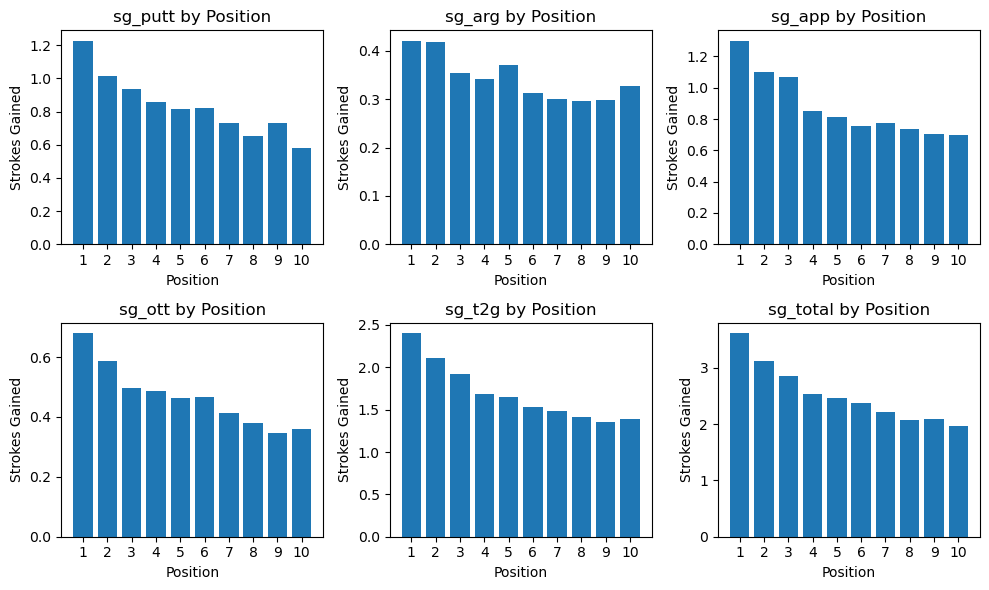

In [99]:
# Using sg_cols created earlier

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2,3, figsize=(10, 6))

# Loop through each SG metric and its index
for i, sg in enumerate(sg_cols):
    # Calculate row and column index for the subplot
    row = i // 3
    col = i % 3
    ax = axs[row][col]

    # Plot bar chart for this SG metric on the corresponding subplot
    ax.bar(top_10_sg['pos'], top_10_sg[sg])
    
    # Set title and axis labels
    ax.set_title(f"{sg} by Position")
    ax.set_xlabel("Position")
    ax.set_ylabel("Strokes Gained")
    ax.set_xticks(top_10_sg['pos'])  # ensures all positions show up on x-axis

# Adjust layout so titles and labels don’t overlap
plt.tight_layout()
plt.show()


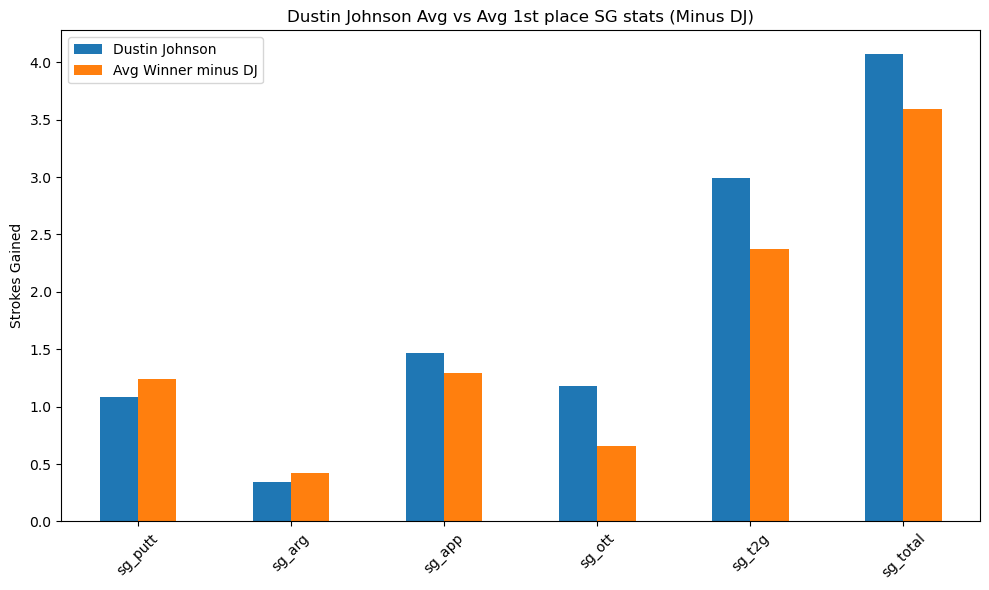

In [26]:
comparison_df.plot(kind='bar', figsize=(10,6))
plt.title('Dustin Johnson Avg vs Avg 1st place SG stats (Minus DJ)')
plt.ylabel('Strokes Gained')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### 🚀 Tee-to-Green Dominance

| Metric     | DJ Avg   | Other Winners Avg | Interpretation |
|------------|----------|-------------------|----------------|
| `sg_ott`   | 1.18     | 0.65              | Huge driver advantage — DJ gained nearly double what others did off the tee. |
| `sg_app`   | 1.47     | 1.29              | Slight edge on approach shots too. |
| `sg_t2g`   | 2.99     | 2.37              | Strong overall ball striking. |
| `sg_total` | 4.08     | 3.59              | Overall DJ gained more strokes per round during wins than other winners. |

**Conclusion:**  
Dustin Johnson won by overpowering courses with elite driving and solid approach play — not with putting or scrambling. His performance tee-to-green consistently separated him from the field.
